In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from neuralNetworkFromScratch import NeuralNetworkFromScratch
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
def min_max_scaler(series):
    normalized = (series - min(series)) / (max(series)-min(series))
    return normalized

In [3]:
def standard_scaler(series):
    mu = np.mean(series)
    std = np.std(series)
    normalized = (series - mu) / std
    return normalized

# Example 1: Simple Linear Regression

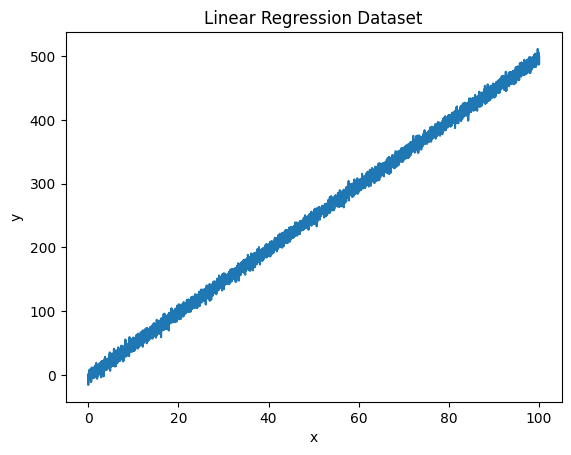

In [4]:
n_points = 10000
a=5
b=-3
alpha = 0.01

x1 = np.linspace(0,100,n_points)
y = a*x1+b

white_noise = np.random.randn(n_points)*max(y)*alpha
y = y + white_noise

features = pd.DataFrame(data={'x1':x1})
target = pd.DataFrame(data={'y':y})
plt.plot(x1,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression Dataset');

## 2. Preprocessing

In [5]:
for col in features.columns:
    features[col] = min_max_scaler(features[col])

In [6]:
# Train - Test Split
train_x, test_x, train_y, test_y = train_test_split(features, target, test_size=0.33, random_state=42)

## 3. Prediction

In [7]:
model = NeuralNetworkFromScratch(layers_dims=[train_x.shape[1], 8, 4, 3, 2, 1], task='regression', learning_rate=1e-5, n_epochs=3000, print_cost=True, keep_prob=1)

Your backward propagation works perfectly fine! difference = 1.4598860937665822e-07
Cost after iteration 0: 41307.93775954825
There is a mistake in the backward propagation! difference = 0.0005339619146538429
Cost after iteration 1000: 14.364328826160234
Your backward propagation works perfectly fine! difference = 4.629350901264629e-09
Cost after iteration 2000: 13.062961237624487
Cost after iteration 2999: 12.681140646115226


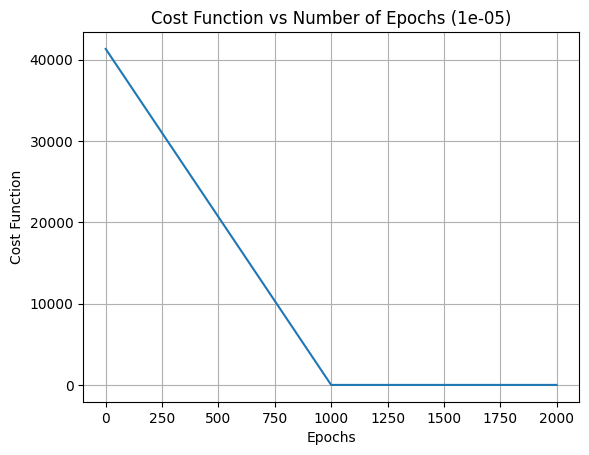

In [8]:
parameters, costs = model.fit(train_x, train_y, print_every=1000, plot_cost_function=True, debug=1000)

In [9]:
pred_train = model.predict(train_x, train_y)

RMSE: 12.680912896015998


In [10]:
pred = model.predict(test_x, test_y)

RMSE: 13.19636295471751


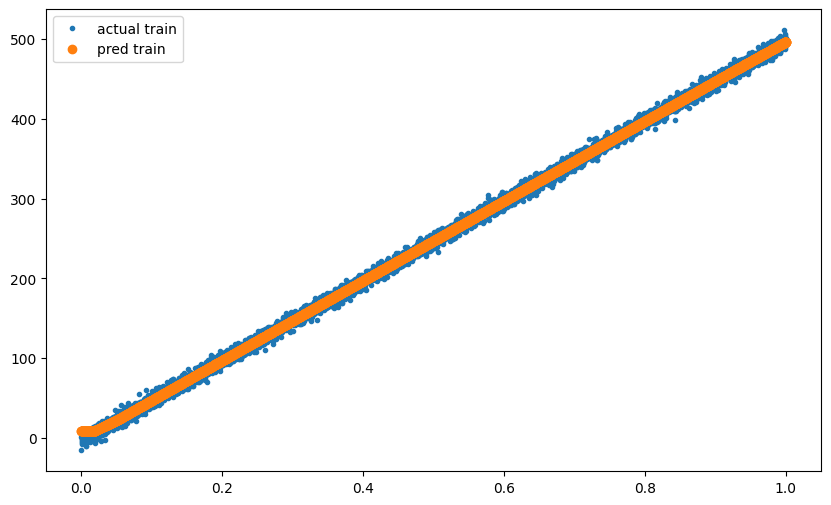

In [11]:
plt.figure(figsize=(10,6))
plt.plot(train_x, train_y, '.', label='actual train')
plt.plot(train_x, pred_train.reshape(-1,1), 'o', label='pred train')
plt.legend();

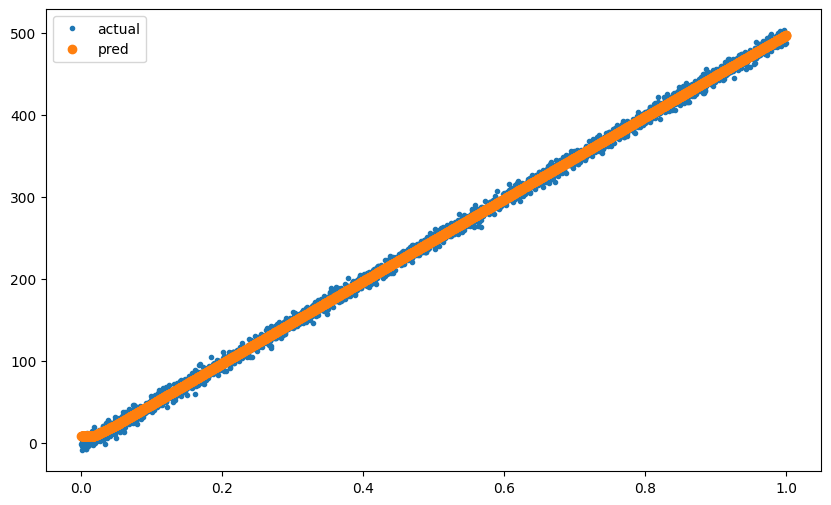

In [12]:
plt.figure(figsize=(10,6))
plt.plot(test_x, test_y, '.', label='actual')
plt.plot(test_x, pred.reshape(-1,1), 'o', label='pred')
plt.legend();

# Example 2: Multiple Linear Regression

## 1. Import Data

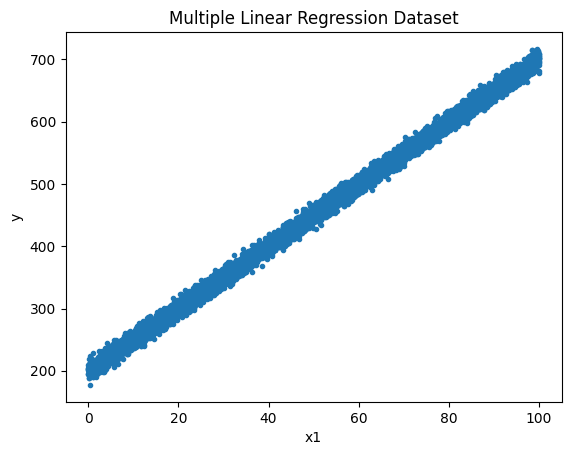

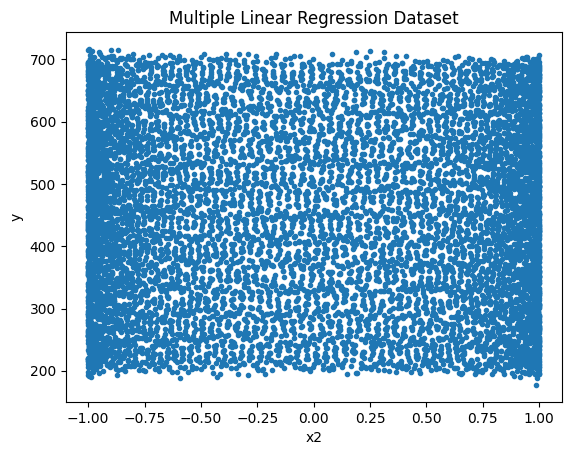

In [13]:
n_points = 10000
a=5
b=-3
c=200
alpha = 0.01

x1 = np.linspace(0,100,n_points)
x2 = np.sin(np.linspace(1250,10526,n_points))

y = a*x1+b*x2+c

white_noise = np.random.randn(n_points)*max(y)*alpha
y = y + white_noise

features = pd.DataFrame(data={'x1':x1, 'x2':x2})
target = pd.DataFrame(data={'y':y})
plt.plot(x1,y, '.')
plt.xlabel('x1')
plt.ylabel('y')
plt.title('Multiple Linear Regression Dataset')

plt.figure()
plt.plot(x2,y, '.')
plt.xlabel('x2')
plt.ylabel('y')
plt.title('Multiple Linear Regression Dataset');

## 2. Preprocessing

In [14]:
# Train - Test Split
split_point = int(n_points * 0.7)

train_x = features[:split_point]
test_x = features[split_point:]
train_y = target[:split_point]
test_y = target[split_point:]

# Train - Test Split
train_x, test_x, train_y, test_y = train_test_split(features, target, test_size=0.33, random_state=42)

In [15]:
for col in train_x.columns:
    train_x[col] = standard_scaler(train_x[col])
    test_x[col] = standard_scaler(test_x[col])

# 3. Prediction

In [21]:
model = NeuralNetworkFromScratch(layers_dims=[train_x.shape[1],2, 1], task='regression', learning_rate=1e-5, n_epochs=5000, print_cost=True, lambd=None)

Your backward propagation works perfectly fine! difference = 1.7285856846078393e-07
Cost after iteration 0: 112171.05387164657
Your backward propagation works perfectly fine! difference = 4.3304122656275577e-08
Cost after iteration 500: 103702.92729026455
Your backward propagation works perfectly fine! difference = 6.914076695155635e-09
Cost after iteration 1000: 5257.396765132852
Your backward propagation works perfectly fine! difference = 4.552054676359496e-09
Cost after iteration 1500: 28.578020178747618
Your backward propagation works perfectly fine! difference = 6.164613159477967e-09
Cost after iteration 2000: 26.56633266135568
Your backward propagation works perfectly fine! difference = 1.6435130845338047e-08
Cost after iteration 2500: 26.523652464832388
Your backward propagation works perfectly fine! difference = 1.38191329502122e-08
Cost after iteration 3000: 26.493099739743585
Your backward propagation works perfectly fine! difference = 1.1440528705405301e-08
Cost after iterat

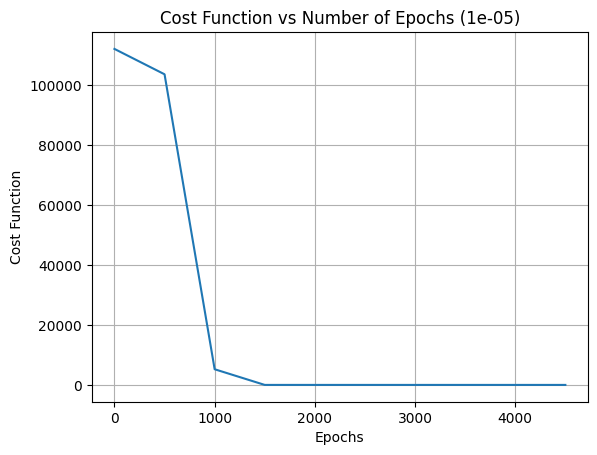

In [22]:
parameters, costs = model.fit(train_x, train_y, print_every=500, plot_cost_function=True, debug=500)

In [23]:
pred_train = model.predict(train_x, train_y)

RMSE: 26.375807741256473


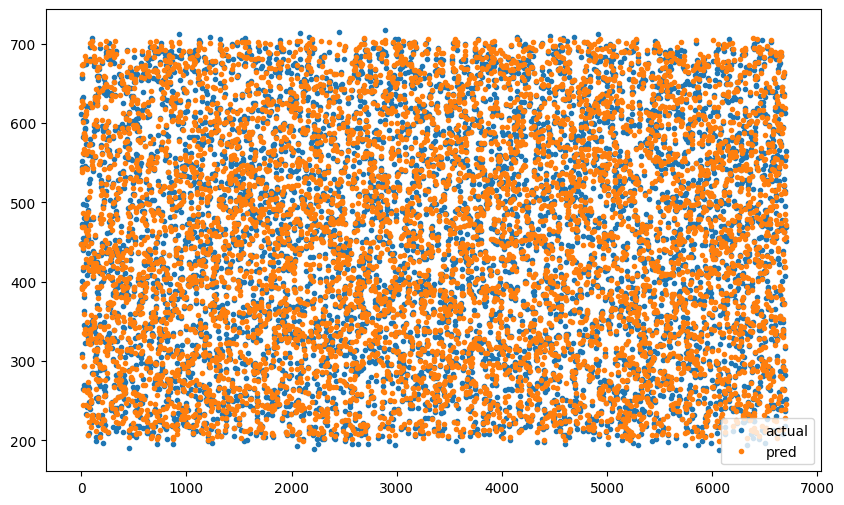

In [24]:
plt.figure(figsize=(10,6))
plt.plot(np.linspace(0,len(train_y),len(train_y)), train_y, '.', label='actual')
plt.plot(np.linspace(0,len(pred_train.T),len(pred_train.T)), pred_train.T, '.', label='pred')
plt.legend();

In [25]:
pred = model.predict(test_x, test_y)

RMSE: 34.2900270232451


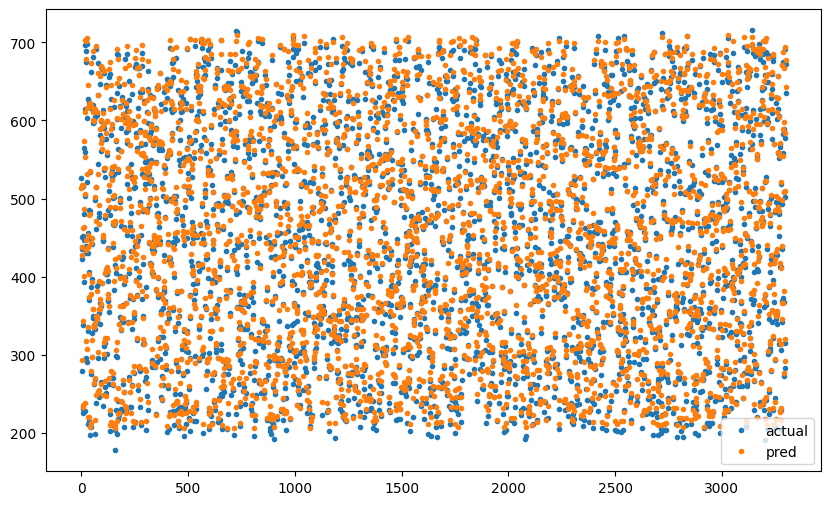

In [26]:
plt.figure(figsize=(10,6))
plt.plot(np.linspace(0,len(test_y),len(test_y)), test_y, '.', label='actual')
plt.plot(np.linspace(0,len(pred.T),len(pred.T)), pred.T, '.', label='pred')
plt.legend();

# Example 3: Fetch California Housing Dataset

## 1. Import Data

In [27]:
data = fetch_california_housing()
features = pd.DataFrame(data=data.data, columns=data.feature_names)
target = pd.DataFrame(data=data.target, columns=data.target_names)

## 2. Preprocessing

In [28]:
for col in features.columns:
    features[col] = standard_scaler(features[col])

In [29]:
train_x, test_x, train_y, test_y = train_test_split(features, target, test_size=0.33, random_state=42)


## 3. Prediction

In [51]:
model = NeuralNetworkFromScratch(layers_dims=[train_x.shape[1],4,3,2, 1], task='regression', learning_rate=5e-3, n_epochs=10000, print_cost=True, lambd=None)

There is a mistake in the backward propagation! difference = 0.09232169139385238
Cost after iteration 0: 2.5528304056807203
Your backward propagation works perfectly fine! difference = 3.5928608346252756e-09
Cost after iteration 1000: 0.40578484341334375
Your backward propagation works perfectly fine! difference = 6.11969392657134e-09
Cost after iteration 2000: 0.2681888856773176
Your backward propagation works perfectly fine! difference = 1.0776810847963228e-08
Cost after iteration 3000: 0.23893578458824355
Your backward propagation works perfectly fine! difference = 1.488562757963477e-08
Cost after iteration 4000: 0.23076516457902344
Your backward propagation works perfectly fine! difference = 1.6117728061838254e-08
Cost after iteration 5000: 0.2260818864743204
Your backward propagation works perfectly fine! difference = 1.2748354942120146e-08
Cost after iteration 6000: 0.22180130785385796
Your backward propagation works perfectly fine! difference = 1.6974174914578914e-08
Cost after 

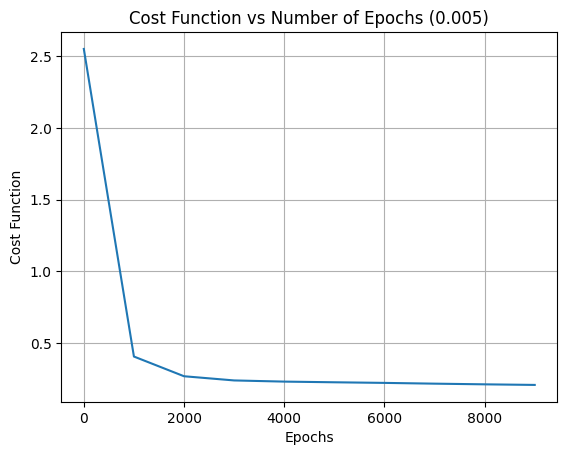

In [52]:
parameters, costs = model.fit(train_x, train_y, print_every=1000, plot_cost_function=True, debug=1000)

In [53]:
pred_train = model.predict(train_x, train_y)
mean_absolute_percentage_error(train_y, pred_train.T)

RMSE: 0.204228037017682


0.2720178838507404

In [54]:
pred = model.predict(test_x, test_y)
mean_absolute_percentage_error(test_y, pred.T)

RMSE: 0.20836131668572103


0.28135263455485365